## Time-Series and Correlations using Python

I've recently created an account with IEX Cloud, a financial data service. As I've been learning the features of this new data source (new to me) and experimenting within my Jupyter Notebook, I thought the below may be helpful for others as well.  Therefore, I'm creating my first Medium article and will focus it on financial time series data. 

There are quite a few articles and sources on defining correlation, and the differences between correlation and causation; so what you will find below will primarily show some ways to test correlation and what the results mean.

If you're following this and coding it yourself, go to https://iexcloud.io/ and get yourself an API key!  You'll need it next!  Also, don't forgot to install an IEX Python library: https://addisonlynch.github.io/iexfinance/.  Install this library using:

**$ pip3 install iexfinance**

In [1]:
import config
import os

#os.environ['IEX_API_VERSION'] = "iexcloud-sandbox"
os.environ['IEX_TOKEN'] = config.iex_api_key  # Replace "config.iex_api_key" with your API Key from IEX Cloud!

The code below will load some python libraries we'll need. Also, set the timeframe of the series we wish to fetch.  Next, download data for the Apple stock (ticker: AAPL).  

In [4]:
from datetime import datetime
from iexfinance.stocks import get_historical_data
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime(2017, 1, 1)
end = datetime(2019, 11, 21)

In [5]:
AAPL = get_historical_data("AAPL", start, end, output_format='pandas')

We'll arbitrarily choose 'close' for the sake of simplicity and this experiment.  From this API data response, you could also choose Open, High, Low, and Volume.  

C:\Users\billv\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


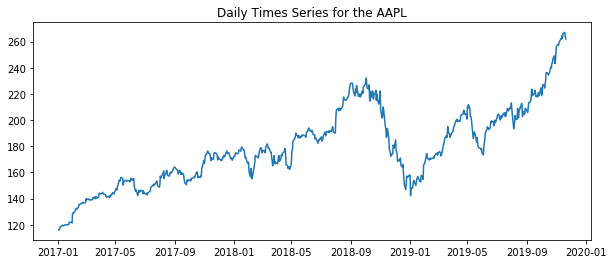

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(AAPL.index, AAPL['close'])  
plt.title('Daily Times Series for the AAPL');

Now, let's make an API call and download more data, 'SPDR S&P 500 Trust ETF,' which tracks the S&P 500 (ticker: SPY).

In [7]:
SPY = get_historical_data("SPY", start, end, output_format='pandas')

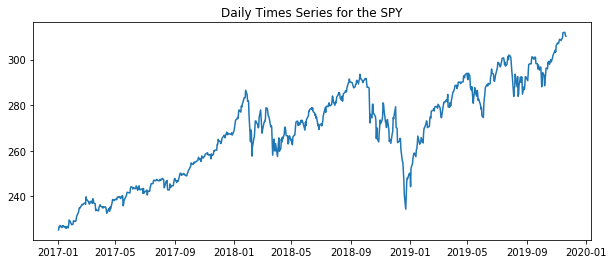

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(SPY.index, SPY['close'])
plt.title('Daily Times Series for the SPY');

Now that we have data for both Apple and the S&P 500, and we've plotted these so that we know what they look like, let's try an experiment!  We're going to try a Pearson Correlation test, to test correlation on Apple and the S&P 500.  What do you think?  Will they correlate?  Correlation will show when the Pearson Correlation Coefficient is between -1 and +1.  If closer to +1, we're seeing a positive correlation.  If Pearson's correlation is closer to -1, a negative correlation.

In [9]:
from scipy.stats import pearsonr
import scipy.stats as stats

c, p = stats.pearsonr(AAPL.dropna()['close'], SPY.dropna()['close'])
print(f"Pearson Correlation: {c}")
print(f"P-value: {p}")

Pearson Correlation: 0.9173242200348919
P-value: 1.366148488463185e-292


A **positive** correlation between AAPL and SPY!  Let's try one more; a correlation test against SPY and Tesla (ticker: TSLA).

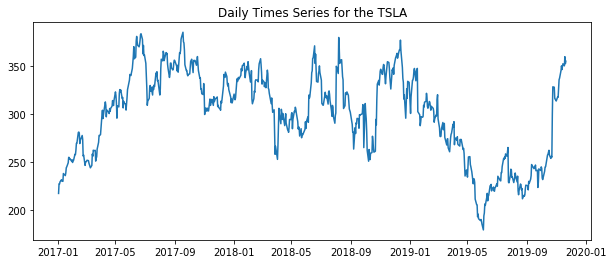

In [13]:
TSLA = get_historical_data("TSLA", start, end, output_format='pandas')
plt.figure(figsize=(10, 4))
plt.plot(TSLA.index, TSLA['close'])
plt.title('Daily Times Series for the TSLA');

In [15]:
c, p = stats.pearsonr(SPY.dropna()['close'], TSLA.dropna()['close'])
print(f"Pearson Correlation: {c}")
print(f"P-value: {p}")

Pearson Correlation: -0.2725813566792509
P-value: 7.199312233136674e-14


And, we have a **negative** correlation between the S&P 500 and Tesla!  Again, don't get me started on correlation versus causation...

In [16]:
from iexfinance.altdata import  get_social_sentiment, get_ceo_compensation

period="minute"
day=datetime(2019, 11, 21)

df4 = get_social_sentiment("AAPL", period, day, output_format='pandas')
#print(day)
print(df4.head())
#print(df4)

Empty DataFrame
Columns: []
Index: []


In [110]:
import json
import requests

print(get_ceo_compensation("AAPL"))
print(get_ceo_compensation("TSLA"))

{'symbol': 'AAPL', 'name': 'Timothy Cook', 'companyName': 'Apple Inc.', 'location': 'Cupertino, CA', 'salary': 3000000, 'bonus': 0, 'stockAwards': 0, 'optionAwards': 0, 'nonEquityIncentives': 12000000, 'pensionAndDeferred': 0, 'otherComp': 682219, 'total': 15682219, 'year': '2018'}
{'symbol': 'TSLA', 'name': 'Elon Musk', 'companyName': 'Tesla Inc', 'location': 'Palo Alto, CA', 'salary': 56380, 'bonus': 0, 'stockAwards': 0, 'optionAwards': 2283988504, 'nonEquityIncentives': 0, 'pensionAndDeferred': 0, 'otherComp': 0, 'total': 2284044884, 'year': '2018'}


In [118]:
import requests

resp = requests.post('https://sandbox.iexapis.com/stable/stock/aapl/sentiment/daily/20190212?token=',config.iex_api_key)
print(resp)

<Response [404]>
